In [35]:
from qiskit import *
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector

In [64]:
num = '110010'
num_len = len(num)

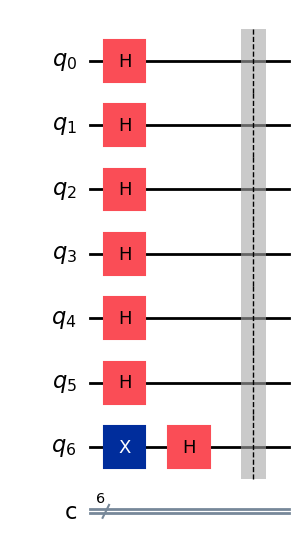

In [68]:
circ = QuantumCircuit(num_len+1, num_len)
circ.h(range(num_len))
circ.x(num_len)
circ.h(num_len)
circ.barrier()
circ.draw('mpl')

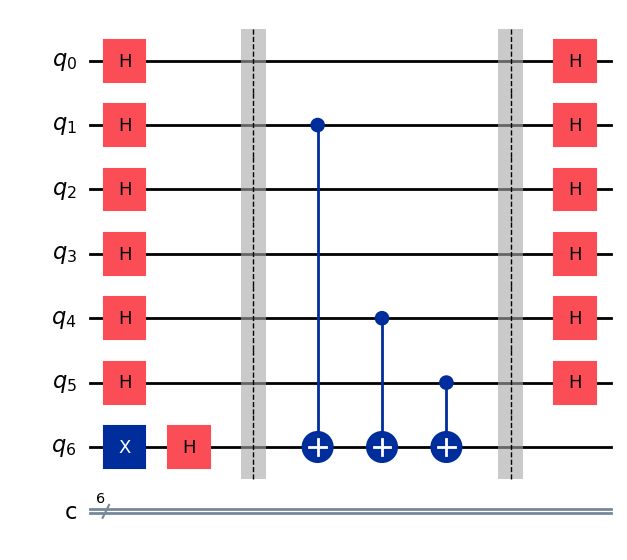

In [69]:
for index, one in enumerate(num[::-1]):
  if one == '1':
    circ.cx(index, num_len)
circ.barrier()
circ.h(range(num_len))
circ.draw('mpl')

In [70]:
state = Statevector.from_instruction(circ)
state.draw('latex')

<IPython.core.display.Latex object>

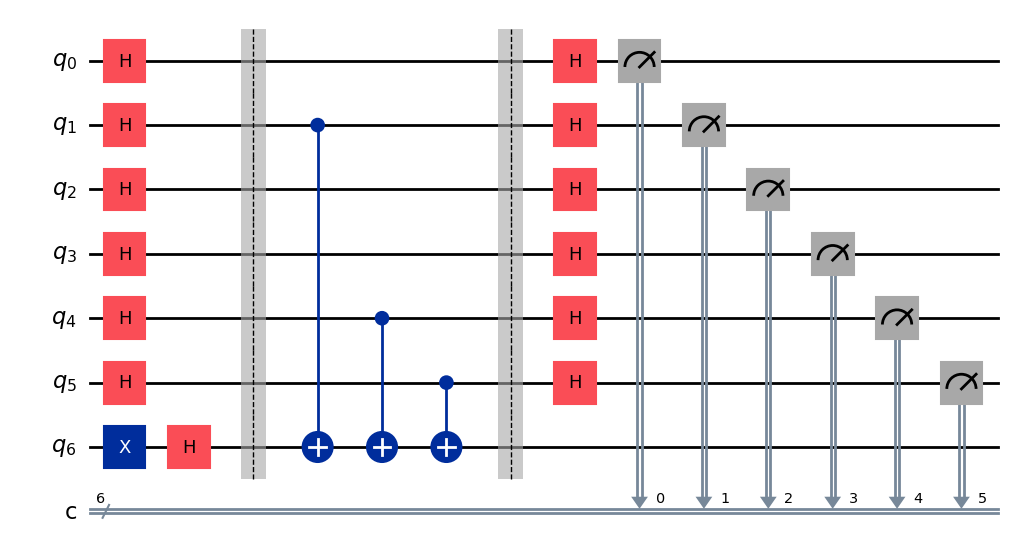

In [71]:
circ.measure(range(num_len), range(num_len))
circ.draw('mpl')

In [72]:
simulator = Aer.get_backend("qasm_simulator")
transpiled_circ = transpile(circ, simulator)
job = simulator.run(transpiled_circ, shots = 1024)
result = job.result()
print(result.get_counts())

{'110010': 1024}
